# Reto: Explorando el índice de felicidad 🙂
El Informe Mundial sobre la Felicidad es una encuesta que clasifica a 156 países por sus niveles de bienestar, tomando en cuenta 6 factores:
1.	Producción económica
2.	Apoyo social
3.	Esperanza de vida
4.	Libertad
5.	Generosidad
6.	Ausencia de corrupción


El primer informe se publicó en 2012 y continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más indicadores de felicidad para informar sus decisiones de formulación de políticas.


En este sentido, se tomará el estudio del 2019 para explorar los datos por país o región y obtener gráficas relevantes. El archivo incluye el puntaje (score) en una escala donde la mejor vida posible está representada con 10 y la peor con 0. Las siguientes columnas representan la medida en que los seis factores contribuyen a evaluar la felicidad en cada país.

In [1]:
# Importación de librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.

2. Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [2]:
happiness = pd.read_csv('Happiness_report.csv')
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [3]:
mexico = happiness.loc[happiness['Country or region']=='Mexico'] # Crear dataframe con información sólo de México
mexico.set_index('Country or region', inplace=True) # Asignar columna Country or region como index
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(6.595, 0, 'MEX')

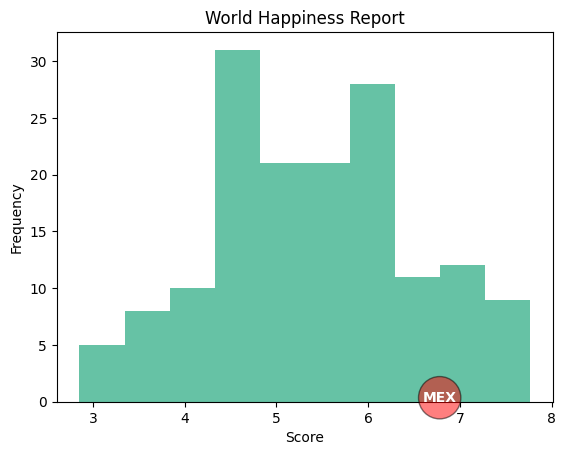

In [32]:
sns.set_palette('Set2') # Configuración paleta de color como el ejemplo
happiness['Score'].plot(kind='hist') # Gráfico de histograma
plt.xlabel('Score') # Personalización etiqueta eje x
plt.title('World Happiness Report') # Personalización título

value = mexico.loc['Mexico','Score'] # Obtención del valor Score para México
props_bbox = {'boxstyle': 'circle', # Diccionario propiedades caja etiqueta
              'facecolor': 'red',
              'alpha': 0.5}
props_font= {'weight':'bold', # Diccionario propiedades fuente etiqueta
             'color':'white'}
plt.text(value,0,'MEX', bbox=props_bbox, fontdict= props_font) # Configuración etiqueta en la ubicación de México

5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

Text(1.2, 0.861, 'MEX')

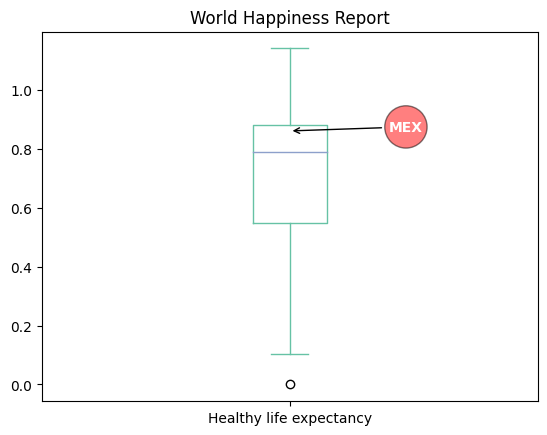

In [54]:
happiness['Healthy life expectancy'].plot(kind='box') # Gráfico de boxplot
plt.title('World Happiness Report') # Personalización título

value2 = mexico.loc['Mexico','Healthy life expectancy'] # Obtención del valor Score para México
props_bbox = {'boxstyle': 'circle', # Diccionario propiedades caja etiqueta
              'facecolor': 'red',
              'alpha': 0.5}

plt.annotate('MEX',xy=(1,value2),xytext=(1.2,value2),arrowprops=dict(arrowstyle='->'), bbox=props_bbox, color='white', fontweight='bold') # Configuración etiqueta en la ubicación de México

6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

In [94]:
mexfactors = mexico.loc[:,'GDP per capita':'Perceptions of corruption']
mexfactors.index.name = None
mexfactors = mexfactors.T
mexfactors.rename(columns={'Mexico': 'Factors'}, inplace=True)
mexfactors

,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


Text(0.5, 1.0, 'Contribution in Mexico happiness score')

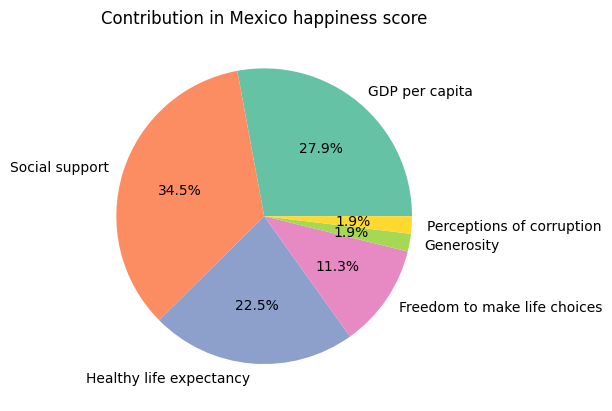

In [97]:
mexfactors['Factors'].plot(kind='pie', ylabel='', autopct='%1.1f%%') # Gráfico de pie
plt.title('Contribution in Mexico happiness score') # Personalización título

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [132]:
countries = happiness[happiness['Country or region'].isin(['Mexico','Australia','Norway'])]
countries = pd.concat([happiness.head(1), countries])
countries = pd.concat([countries, happiness.tail(1)])
countries = countries.set_index('Country or region')
countries = countries.loc[:,'GDP per capita':'Perceptions of corruption'].T
countries

Country or region,Finland,Norway,Australia,Mexico,South Sudan
GDP per capita,1.340,1.488,1.372,1.070,0.306
Social support,1.587,1.582,1.548,1.323,0.575
Healthy life expectancy,0.986,1.028,1.036,0.861,0.295
Freedom to make life choices,0.596,0.603,0.557,0.433,0.010
Generosity,0.153,0.271,0.332,0.074,0.202
Perceptions of corruption,0.393,0.341,0.290,0.073,0.091


Text(0.5, 1.0, 'World Happiness Report')

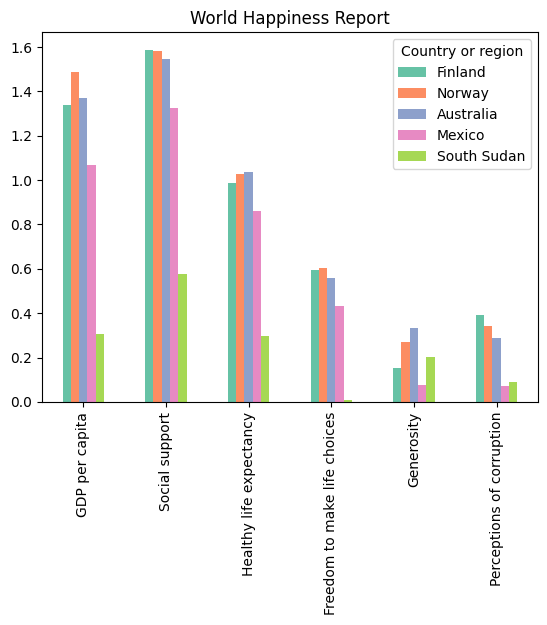

In [134]:
countries.plot(kind='bar') # Gráfico de barras
plt.title('World Happiness Report') # Personalización título

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

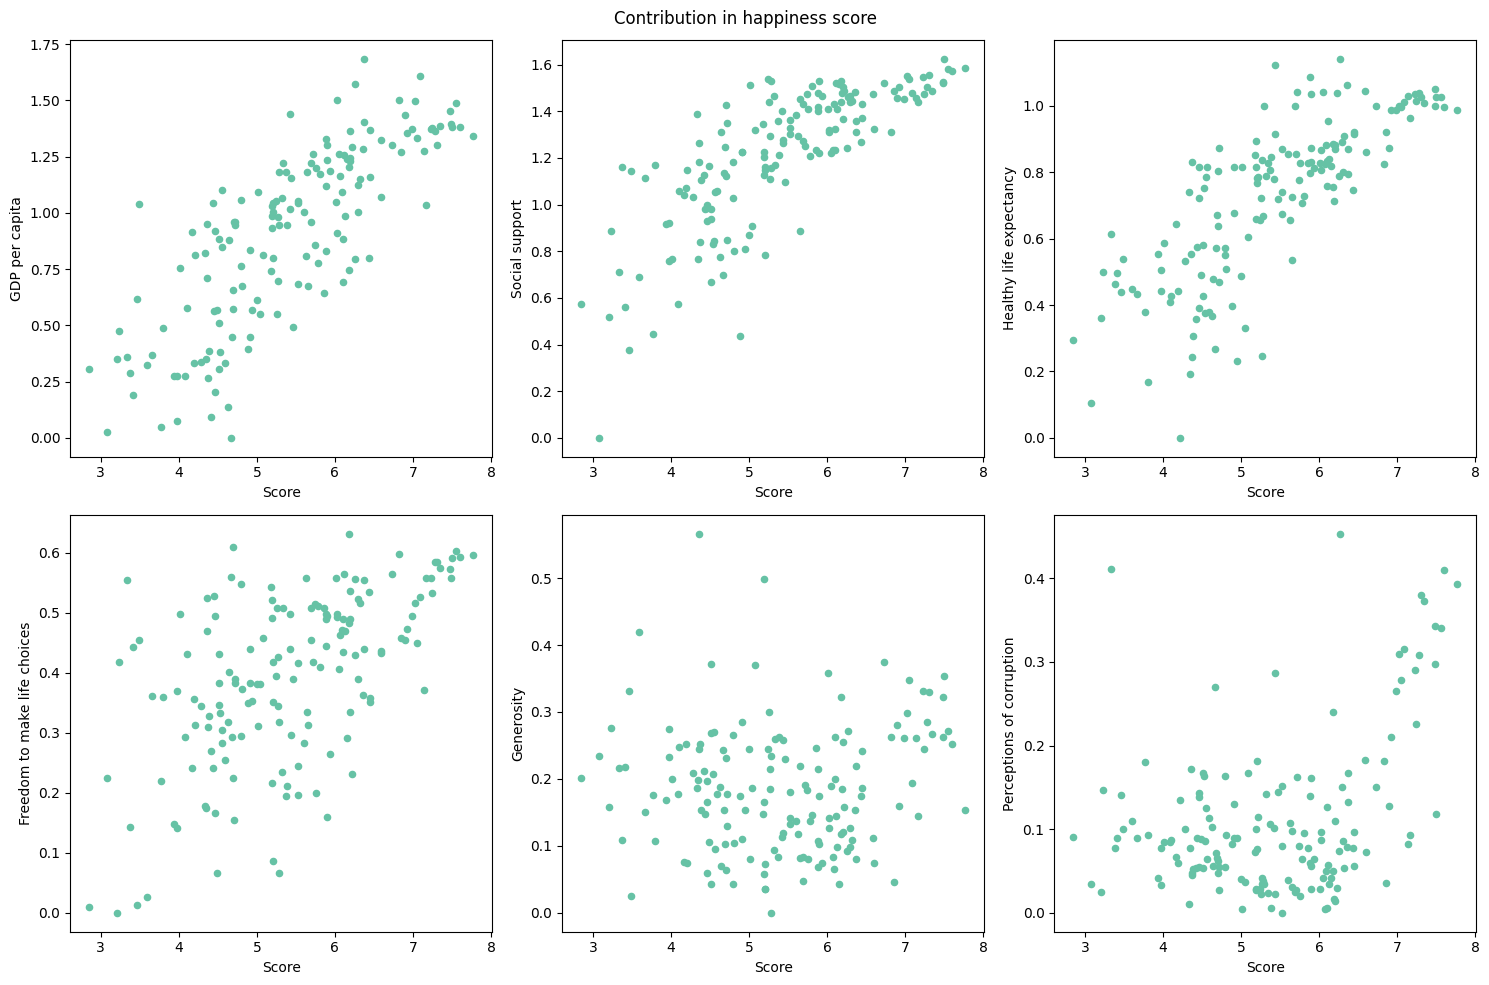

In [155]:
fig = plt.figure(figsize=(15,10))
plt.suptitle('Contribution in happiness score')

ax1 = fig.add_subplot(231)
happiness.plot(kind='scatter',x='Score',y='GDP per capita', ax=ax1)

ax2 = fig.add_subplot(232)
happiness.plot(kind='scatter',x='Score',y='Social support', ax=ax2)

ax3 = fig.add_subplot(233)
happiness.plot(kind='scatter',x='Score',y='Healthy life expectancy', ax=ax3)

ax4 = fig.add_subplot(234)
happiness.plot(kind='scatter',x='Score',y='Freedom to make life choices', ax=ax4)

ax5 = fig.add_subplot(235)
happiness.plot(kind='scatter',x='Score',y='Generosity', ax=ax5)

ax6 = fig.add_subplot(236)
happiness.plot(kind='scatter',x='Score',y='Perceptions of corruption', ax=ax6)

plt.tight_layout()

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<ipython-input-160-0fbc26324530>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = happiness.corr() # Creación de matriz correlaciones


<Axes: >

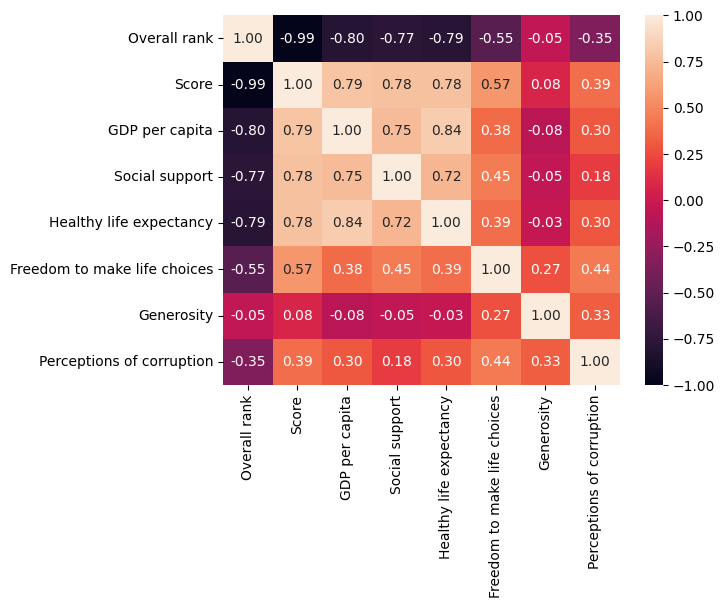

In [160]:
correlation_matrix = happiness.corr() # Creación de matriz correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", vmin=-1,vmax=1) # Gráfico de mapa de calor

9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [199]:
metadata = pd.read_csv('Metadata.csv')
dfmerge= pd.merge(left = happiness, right = metadata, left_on='Country or region', right_on='TableName')
dfmerge = dfmerge.groupby('Region')['Score'].mean()
dfmerge = dfmerge.reset_index()
dfmerge

,Region,Score
0,East Asia & Pacific,5.658769
1,Europe & Central Asia,6.104174
2,Latin America & Caribbean,6.007579
3,Middle East & North Africa,5.757429
4,North America,7.085000
5,South Asia,4.526857
6,Sub-Saharan Africa,4.260000


Text(0.5, 1.0, 'World Happiness Report')

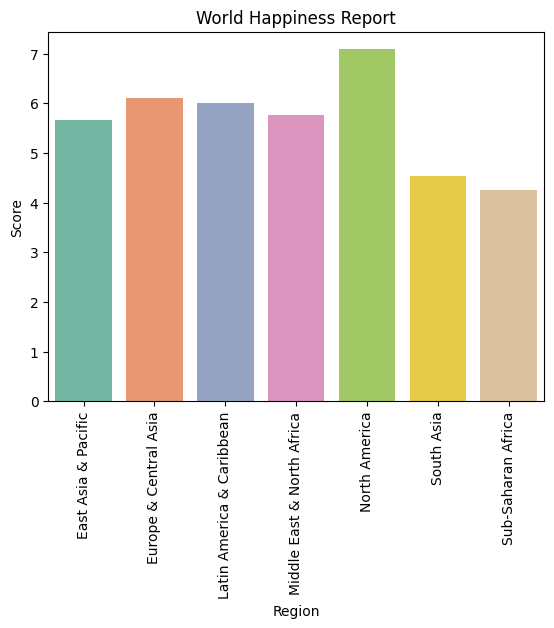

In [200]:
sns.barplot(x='Region', y='Score', data=dfmerge) # Gráfico de barras
plt.xticks(rotation=90) # Personalización eje x
plt.title('World Happiness Report') # Personalización título